# Data Information:

## Input variables:


## Output variable (desired target):


# Data preprocessing 

Import libraries and data, select a small sample set for trainning


In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

lol_origin = pd.read_csv('./leagueoflegends/leagueoflegends.csv')
lol = lol_origin.copy()
lol.tail()

,bu,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...",...,Veigar,"[500, 500, 632, 982, 1258, 1667, 2060, 2390, 2...",Zeitnot,Xayah,"[500, 500, 564, 1027, 1320, 1727, 1963, 2276, ...",SnowFlower,Rakan,"[500, 500, 566, 801, 1004, 1234, 1463, 1674, 1...","['Ornn', 'Kalista', 'Ryze', 'Alistar', 'Shen']",https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...",...,Ryze,"[500, 500, 612, 1000, 1193, 1626, 1979, 2318, ...",Ruvelius,Caitlyn,"[500, 500, 621, 977, 1420, 1809, 2047, 2413, 2...",Japone,Braum,"[500, 500, 587, 790, 1107, 1335, 1472, 1616, 1...","['Zoe', 'KogMaw', 'JarvanIV', 'Ornn', 'Rengar']",https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ...",...,Malzahar,"[500, 500, 615, 903, 1225, 1617, 1976, 2304, 2...",k1ng,Ezreal,"[500, 508, 592, 986, 1400, 1753, 2196, 2538, 3...",Cupcake,Taric,"[500, 500, 585, 770, 976, 1222, 1446, 1627, 19...","['Azir', 'Kalista', 'Braum', 'Maokai', 'Alistar']",https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...",...,Veigar,"[500, 500, 561, 931, 1223, 1631, 1987, 2315, 2...",Low,Sivir,"[500, 500, 634, 930, 1304, 1691, 2042, 2384, 2...",Tilting,Janna,"[500, 500, 592, 788, 1006, 1251, 1490, 1704, 1...","['Kalista', 'Galio', 'Gnar', 'Jayce', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...
7619,OPL,2018,Spring,Season,TTC,0,1,LGC,42,"[0, 0, -8, -225, -36, 73, 464, 184, 1171, 1409...",...,Malzahar,"[500, 500, 598, 968, 1165, 1477, 1801, 2016, 2...",Raid,Vayne,"[500, 500, 587, 954, 1327, 1749, 2007, 2471, 2...",Decoy,Braum,"[500, 500, 585, 793, 998, 1201, 1373, 1619, 18...","['KogMaw', 'Illaoi', 'Azir', 'Karma', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...


In [2]:
#lol = lol_origin.drop(['goldblue','goldred','Address','bBarons','rBarons','redBans','blueBans',],1) 
#this is the way we treat 'player' as nominal variables

lol = lol_origin.drop(['golddiff','goldblue','goldred','Address','bBarons','rBarons','redBans','blueBans','blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport','gamelength'],1) 
# this is the way we treat 'player' as ordinal variables, therefore, we set them as dummies later

for x in ['goldblueTop','goldblueJungle','goldblueMiddle','goldblueADC','goldblueSupport',
          'goldredTop','goldredJungle','goldredMiddle','goldredADC','goldredSupport']:
    lol[x] = [int(y.split(',')[14]) for y in lol_origin[x]]

for x in ['Top','Jungle','Middle','ADC','Support']:
    lol['golddiff' + x ] = lol['goldblue' + x ] - lol['goldred' + x ]
    del lol['goldblue' + x ]
    del lol['goldred' + x ]

In [3]:
def get_data15(feature):
    info = [x[2:-2] for x in feature]
    data15 = []
    for y in info:
        y = y.split('], [')
        j = 0
        for z in y:
            if z.strip() =='':
                break
            else:
                z=z.split(',')
                n =float(z[0])
                if n < 15.0 :
                    j = j + 1
        data15.append(j)
    return data15

In [4]:
for x in ['bKills','bTowers','bInhibs','bDragons','bHeralds',
          'rKills','rTowers','rInhibs','rDragons','rHeralds']:
    del lol[x]
    lol[x] = get_data15(lol_origin[x])

In [5]:
champ_names = lol_origin['blueTopChamp']
player_names = lol_origin['blueTop']
team_names = lol_origin['blueTeamTag']
for x in ['blueMiddleChamp','blueJungleChamp','blueADCChamp','blueSupportChamp',
          'redTopChamp','redMiddleChamp','redJungleChamp','redADCChamp','redSupportChamp']:
    champ_names = champ_names.append(lol_origin[x])
for x in ['blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']:
    player_names = player_names.append(lol_origin[x])
team_names = team_names.append(lol_origin['redTeamTag'])

### Processing the ordinal and nominal data,seperately

In [6]:
from sklearn.preprocessing import LabelEncoder

def nominal_transform(names,sets):
    le = LabelEncoder()
    le.fit_transform(names.astype(str))
    for x in sets:
        lol[x] = le.transform(lol_origin[x].astype(str))

In [7]:
Position = ['blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']
Champ = [x+'Champ' for x in Position]
Team = ['blueTeamTag','redTeamTag']
Other = ['bu','Season','Type']

nominal_transform(champ_names,Champ)
#nominal_transform(player_names,Position)   #this is the way we treat 'player' as nominal variables
nominal_transform(team_names,Team)

for x in Other:
    le = LabelEncoder()
    lol[x] = le.fit_transform(lol_origin[x].astype(str))

In [8]:
dummies_Player = pd.get_dummies(lol_origin[['blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']])
# transform players' names into dummies

In [9]:
Champ_list = sorted(champ_names.unique())
lol_origin.redBans = lol_origin.redBans.str.strip('[]').str.replace("'",'')
lol_origin.blueBans = lol_origin.blueBans.str.strip('[]').str.replace("'",'')
dummies_Champ_Bans = pd.DataFrame(np.zeros((len(lol_origin),len(Champ_list))),columns=Champ_list)
for i, Champ in enumerate(lol_origin.redBans):
    Champ = str(Champ)
    for ban in Champ.split(', '):
        dummies_Champ_Bans.ix[i, ban] = 1
for i, Champ in enumerate(lol_origin.blueBans):
    Champ = str(Champ)
    for ban in Champ.split(', '):
        dummies_Champ_Bans.ix[i, ban] = 1
del dummies_Champ_Bans['']
lol = lol.join(dummies_Champ_Bans)
lol = lol.join(dummies_Player) # treat players as ordinal variables
#lol.to_excel('lol_players_nominal.xlsx')   # export nominal_player data into excel, ordinal data is too big to export.


D:\python3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [10]:
y = lol['bResult']
X = lol.drop(['bResult','rResult'],1)

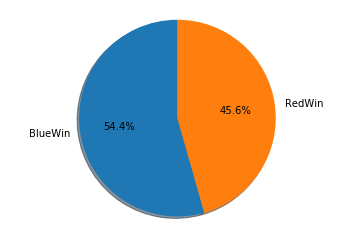

In [11]:
labels = 'BlueWin', 'RedWin'
sizes = [y.value_counts()[1],y.value_counts()[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Splitting data into 70% training and 30% test data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### Bringing features onto the same scale(Standardization)

In [13]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# Feature Importance

## Random Forest Selection

 1) golddiffMiddle                 0.049232
 2) golddiffADC                    0.044670
 3) golddiffTop                    0.042095
 4) golddiffJungle                 0.040907
 5) golddiffSupport                0.040879
 6) bKills                         0.029636
 7) rDragons                       0.029326
 8) rKills                         0.028529
 9) bDragons                       0.020325
10) rTowers                        0.018053
11) bTowers                        0.016279
12) redTeamTag                     0.005852
13) blueTopChamp                   0.005294
14) redMiddleChamp                 0.005166
15) blueMiddleChamp                0.005092
16) redTopChamp                    0.004989
17) blueTeamTag                    0.004938
18) blueJungleChamp                0.004836
19) redJungleChamp                 0.004716
20) blueSupportChamp               0.004587
21) redADCChamp                    0.004551
22) redSupportChamp                0.004161
23) blueADCChamp                

187) blueADC_YutoriMoyasi           0.000684
188) blueSupport_Luna               0.000671
189) blueJungle_SeongHwan           0.000670
190) Maokai                         0.000666
191) Zyra                           0.000660
192) blueTop_Ziv                    0.000649
193) redSupport_kaSing              0.000644
194) blueADC_Breeze                 0.000644
195) redADC_Apollo                  0.000642
196) KogMaw                         0.000641
197) Kennen                         0.000640
198) redTop_Nexus                   0.000640
199) redMiddle_Swiffer              0.000637
200) redMiddle_Goldenglue           0.000636
201) redADC_Raes                    0.000635
202) blueMiddle_SaSin               0.000634
203) blueADC_Sedrion                0.000632
204) Alistar                        0.000631
205) redSupport_EDward              0.000628
206) blueADC_NoA                    0.000628
207) Zed                            0.000627
208) Ekko                           0.000627
209) Xayah

1357) redMiddle_Breaker              0.000135
1358) redMiddle_Looch                0.000135
1359) blueSupport_Lustboy            0.000135
1360) redTop_MANTARRAYA              0.000135
1361) blueSupport_kazze              0.000134
1362) blueMiddle_REMIND              0.000134
1363) redJungle_Rawbin               0.000134
1364) redTop_jer0m                   0.000134
1365) redJungle_Helios               0.000134
1366) blueSupport_Stunt              0.000134
1367) blueSupport_K                  0.000134
1368) redADC_Woolite                 0.000134
1369) blueADC_Celaver                0.000134
1370) redMiddle_Goku                 0.000133
1371) Jinx                           0.000133
1372) redADC_NoA                     0.000133
1373) blueTop_Rare                   0.000133
1374) DrMundo                        0.000133
1375) redADC_Achuu                   0.000133
1376) blueTop_PvPStejos              0.000133
1377) blueSupport_Unlimited          0.000132
1378) redJungle_Impaler           

2323) redTop_Mimer                   0.000028
2324) blueSupport_DCStar             0.000028
2325) redSupport_Saviour             0.000028
2326) redTop_raizin                  0.000028
2327) blueMiddle_Republic            0.000028
2328) blueSupport_Decoy              0.000028
2329) redMiddle_TaeYeon              0.000028
2330) blueJungle_007x                0.000027
2331) redSupport_Kitties             0.000027
2332) redMiddle_PerkZ                0.000027
2333) blueTop_Aluka                  0.000027
2334) blueJungle_Ninja               0.000027
2335) blueTop_SatoRy                 0.000027
2336) Sona                           0.000027
2337) redTop_S CCB                   0.000027
2338) redMiddle_Slooshi8             0.000027
2339) blueSupport_Rule18             0.000027
2340) redMiddle_Wind                 0.000027
2341) blueADC_Loken                  0.000027
2342) blueSupport_Zest               0.000027
2343) redJungle_DayDream             0.000027
2344) blueJungle_Loveling         

2948) blueTop_brTT RX                0.000000
2949) blueTop_cackgod                0.000000
2950) blueTop_calitrlolz8            0.000000
2951) redSupport_Niko3333            0.000000
2952) Volibear                       0.000000
2953) redMiddle_bebe                 0.000000
2954) redSupport_Nukeduck            0.000000
2955) redSupport_PromisQ             0.000000
2956) redMiddle_Magebane             0.000000
2957) redSupport_Pyl                 0.000000
2958) Tryndamere                     0.000000
2959) redSupport_Rabi2               0.000000
2960) blueTop_i KeNNy u              0.000000
2961) redMiddle_do it                0.000000
2962) Teemo                          0.000000
2963) redJungle_Flaw                 0.000000
2964) blueTop_Armut                  0.000000
2965) blueTop_Artaphernes            0.000000
2966) blueTop_Crimson                0.000000
2967) blueTop_Eryon                  0.000000
2968) redJungle_Crimson              0.000000
2969) redMiddle_Tiridus           

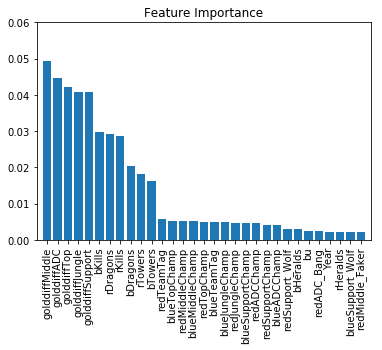

In [14]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,
                                max_features = 'log2',n_jobs=8,criterion='gini',random_state = 1)

forest.fit(X_train, y_train)

print('accuracy of trainning = ' ,forest.score(X_train,y_train))
print('accuracy of testing = ' ,forest.score(X_test,y_test))

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plot_number = 31    
plt.title('Feature Importance')
plt.bar(range(0,plot_number), 
        importances[indices[0:plot_number]],
        align='center')

plt.xticks(range(0,plot_number), 
           feat_labels[indices[0:plot_number]], rotation=90)
plt.xlim([-1, plot_number])
plt.ylim([0.00000,0.06])
plt.savefig('/random_forest_selection.png', dpi=300)
plt.show()

## PCA Selection

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([  3.39820015e-03,   3.09694271e-03,   2.99061520e-03, ...,
         2.85366143e-38,   1.32559445e-39,   9.08959234e-40])

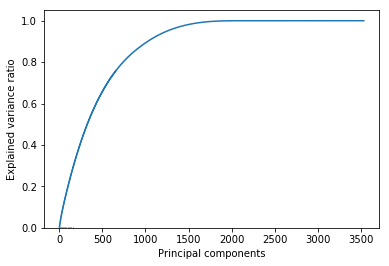

In [16]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [17]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(penalty='l1',C=0.1,random_state=1)
lr1 = lr.fit(X_train_pca, y_train)
print('accuracy of trainning = ' ,lr1.score(X_train_pca,y_train))
print('accuracy of testing = ' ,lr1.score(X_test_pca,y_test))

lr2 = LogisticRegression(penalty='l1',C=0.1,random_state=1)
lr2 = lr.fit(X_train, y_train)
print('accuracy of trainning = ' ,lr2.score(X_train,y_train))
print('accuracy of testing = ' ,lr2.score(X_test,y_test))

accuracy of trainning =  0.714848143982
accuracy of testing =  0.699037620297
accuracy of trainning =  0.854705661792
accuracy of testing =  0.73053368329


<br>
<br>

# Training Data with Different Models

svm

logistic regression

XGboost

NN


In [19]:

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_pca, y_train)
print('accuracy of trainning = ' ,svm.score(X_train_pca,y_train))
print('accuracy of testing = ' ,svm.score(X_test_pca,y_test))


accuracy of trainning =  0.714848143982
accuracy of testing =  0.698162729659


In [40]:
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=50 , max_depth=4, min_child_weight=1,
                        subsample=0.6, colsample_bytree=0.7,
                        reg_alpha = 1, gamma=0.02,objective='binary:logistic',
                        scale_pos_weight=1.2, silent=0, seed=1000)
xgb_clf.fit(X_train,y_train)
print('accuracy of trainning = ' ,xgb_clf.score(X_train,y_train))
print('accuracy of testing = ' ,xgb_clf.score(X_test,y_test))


accuracy of trainning =  0.768466441695
accuracy of testing =  0.731846019248


In [38]:
from keras import models, layers, regularizers

def model_nn(droprate, neuron1, neuron2, optm, lr):
    model = models.Sequential()
    model.add(layers.Dense(neuron1, activation='relu', kernel_initializer='random_uniform',
                           kernel_regularizer=regularizers.l2(lr), input_shape=(131,)))
    model.add(layers.Dropout(droprate))
    model.add(layers.Dense(neuron2, activation='relu'))
    model.add(layers.Dropout(droprate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optm, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 模型拟合
my_weight={0:1,1:9}
nn_clf = model_nn(0.25, 16, 16, 'RMSprop', 0.001)
nn_ot = nn_clf.fit(X_train_pca, y_train, epochs=50, batch_size=5,verbose=1,class_weight=my_weight)


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'